<div><img src="http://fligoo.com/img/logos/logo-fligoo.png" width="200" style="float: center;"></div>
<div style="clear:both;"></div>

<h1 style="font-size: 35px;">Visualization Catalog</h1>

# Tutorial

This is a basic tutorial of how to use the [Visualization Catalog](https://github.com/nicotom/visualization_catalog) with a simple example with the titanic dataset from [Kaggle](https://www.kaggle.com/c/titanic)

![](https://www.biography.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cg_faces:center%2Cq_auto:good%2Cw_768/MTI5MzY2NjIzMTA1NTkxOTM5/titanic-3jpg.jpg)

## Requisites
Import required libraries

In [1]:
# Avoid warnings in this tutorial
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from jupyterthemes import jtplot
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc

c:\users\s1565609\appdata\local\conda\conda\envs\edmachina\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
jtplot.style(figsize=(15, 6), grid=False)

In [5]:
# Auxiliar functions
def gif(url, width=480, height=480):
    return HTML(f'<img src="https://media.giphy.com/media/{url}/giphy.gif" width="{width}" height="{height}">')

## Load the dataset

In [6]:
# get titanic csv files as a DataFrame
training = pd.read_csv("data/train.csv")

In [7]:
training.head() # print first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Sex
Let's talk about sex...


In [8]:
gif('MZ9nZGQn1nqBG', height=432)

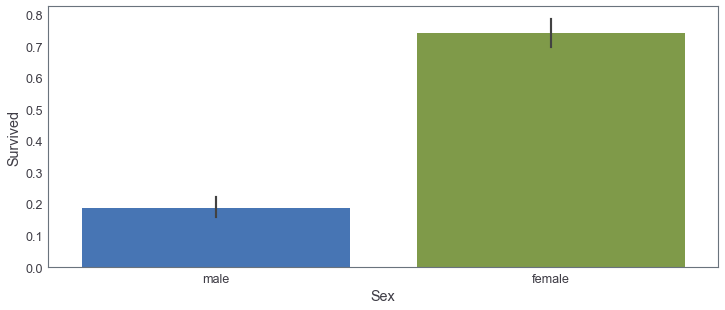

In [9]:
# Let's draw a bar plot of Sex/Survived
ax = sns.barplot(x="Sex", y="Survived", data=training)

Female passengers had more survival rate than men.

## Money
Which class were the passengers?

In [10]:
gif('9HQRIttS5C4Za', height=256)

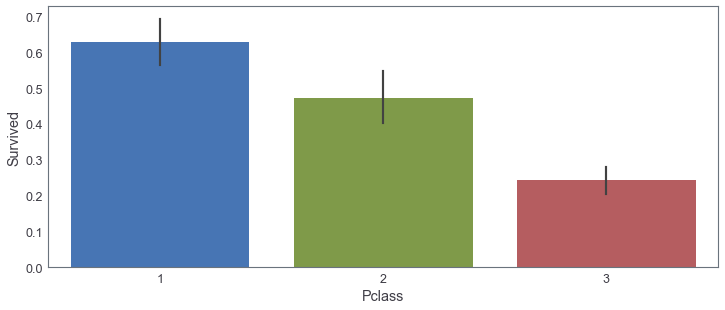

In [11]:
# Let's draw a bar plot of PClass/Survived
ax = sns.barplot(x="Pclass", y="Survived", data=training)

The higher the class the higher survival rate.
```
1st class > 2nd class > 3rd class
```

Let's show the relationship between Class, Sex and whether it survived

In [12]:
tmp = pd.DataFrame(training.groupby(('Pclass', 'Sex')).Survived.mean()).unstack()
tmp.columns = tmp.columns.droplevel()
tmp

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


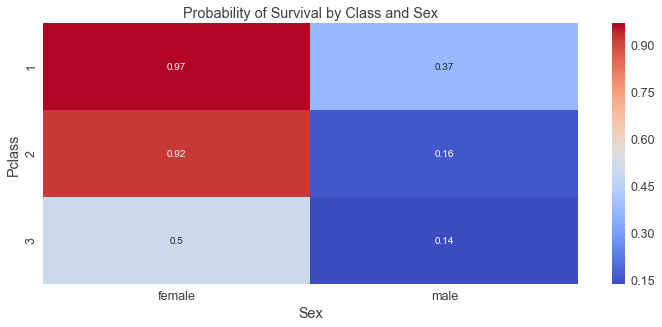

In [13]:
# Draw a heatmap
ax = sns.heatmap(tmp, cmap="coolwarm", annot=True, annot_kws={"size": 10})
_ = ax.set_title('Probability of Survival by Class and Sex')

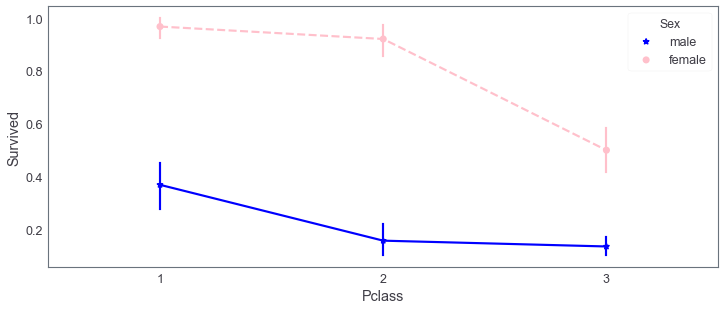

In [14]:
# Draw a pointplot
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=training,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

## What about age?

In [15]:
gif('GrUhLU9q3nyRG', height=261)

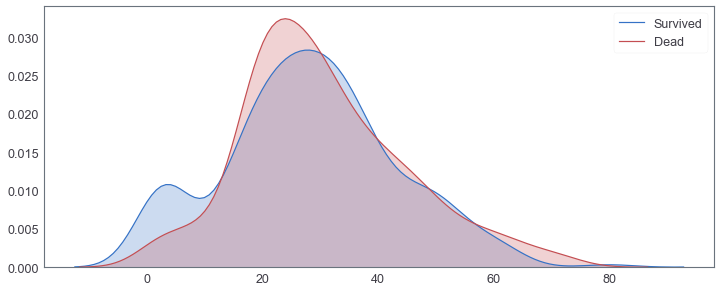

In [16]:
p1=sns.kdeplot(training[training.Survived == 1]['Age'], shade=True, color="b", label='Survived')
p2=sns.kdeplot(training[training.Survived == 0]['Age'], shade=True, color="r", label='Dead')

In [17]:
def show_response_rate(data, field, response, top_n=None, count_type='bar', title=None, column_name='Examples'):
    ds = data[data[field].notnull()].groupby(field)[response].agg(['count', 'sum'])
    ds['response_rate'] = ds['sum'] / ds['count']
    if top_n:
        ds = ds.sort_values(by='count', ascending=False).head(top_n).reset_index()
    else:
        ds = ds.reset_index()

    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    if count_type == 'distplot':
        sns.distplot(data[data[field].notnull()][field], ax=ax, label=f'Distribution of {column_name}')
    else:
        ax.bar(ds.index, ds["count"], color="b", label=f'Distribution of {column_name}')
        ax.set_xticks(ds.index)
        ax.set_xticklabels(ds[field])

    ax2.plot(ds.index, ds["response_rate"], color='green', label='Response rate', lw=2, marker='o', markersize=10)
    ax.set_ylabel(f"Number of {column_name}")
    ax.set_xlabel(field)
    ax2.set_ylabel(response)
    ax2.set_ylim(0, ax2.get_ylim()[1])
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
    plts, labels = ax.get_legend_handles_labels()
    plts2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(plts + plts2, labels + labels2, loc='upper left', bbox_to_anchor=(1.1, 1))
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=0 if max(len(x.get_text()) for x in ax.get_xticklabels()) < 9 else 20, ha='right')
    fig.suptitle("{} rate by {}.".format(response, field if not isinstance(title, str) else title))
    return ds

In [18]:
variable = 'Age'
df_subset = training[[variable, 'Survived']]
df_subset[variable] = pd.cut(df_subset[variable], [0, 10, 20, 30, 40, 50, 60, 70, float('inf')], precision=0, right=False)
df_subset.head()

,Age,Survived
0,"[20.0, 30.0)",0
1,"[30.0, 40.0)",1
2,"[20.0, 30.0)",1
3,"[30.0, 40.0)",1
4,"[30.0, 40.0)",0


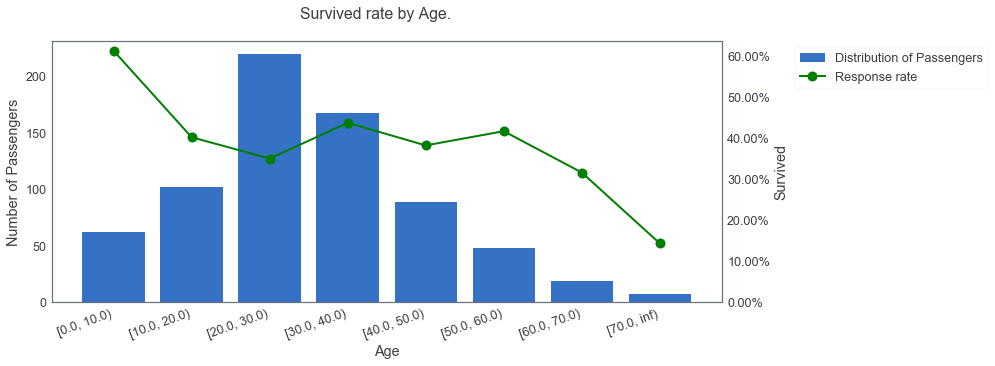

In [19]:
# Let's show a plot by the distribution of age and the survival rate
_ = show_response_rate(data=df_subset, field='Age', response='Survived', column_name='Passengers')

## Feature Engineering
Feature creation, transformation and Data Cleansing

In [20]:
gif('1hBWtlec4aAb37ggn8', height=478)

In [21]:
train = training[['Sex', 'Pclass', 'Age', 'Survived']].dropna(subset=['Age'])
train['Pclass'] = train['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
X = pd.concat([pd.get_dummies(train['Sex']), pd.get_dummies(train['Pclass']), train['Age']], axis=1)
X.rename(columns={'Age': 'age'}, inplace=True)
y = train['Survived']

In [22]:
pd.concat([X, y], axis=1).head()

,female,male,first,second,third,age,Survived
0,0,1,0,0,1,22.0,0
1,1,0,1,0,0,38.0,1
2,1,0,0,0,1,26.0,1
3,1,0,1,0,0,35.0,1
4,0,1,0,0,1,35.0,0


## Model Training
Let's train and compare two models to check their performance

In [23]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Save metrics
fpr = dict()
tpr = dict()

#### Random Forest
Let's train a Random Forest as our first model

In [24]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
fpr['Random Forest'], tpr['Random Forest'], _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
print('Accuracy {:.2%}'.format(accuracy_score(y_test, rf_clf.predict(X_test))) )

Accuracy 78.32%


#### Logistic Regression
Let's train a Logistic Regression to compare the models

In [25]:
logreg_clf = LogisticRegression(random_state=42)
logreg_clf.fit(X_train, y_train)
fpr['Logistic Regression'], tpr['Logistic Regression'], _ = roc_curve(y_test, logreg_clf.predict_proba(X_test)[:,1])
print('Accuracy {:.2%}'.format(accuracy_score(y_test, logreg_clf.predict(X_test))) )

Accuracy 73.43%


Let's compare them now

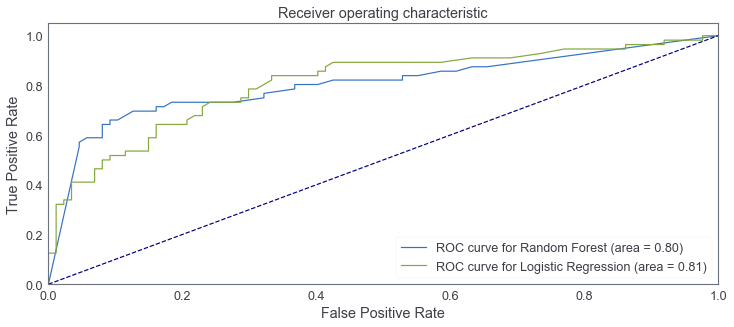

In [26]:
plt.figure()
for key in fpr.keys():
    plt.plot(fpr[key], tpr[key], label='ROC curve for %s (area = %0.2f)' % (key, auc(fpr[key], tpr[key])))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Prediction
To give an end to this story...

In [27]:
def predict_survival(female=0, male=0, first=0, second=0, third=0, age=0, **kwargs):
    tmp = pd.DataFrame.from_dict({
        'female': [female], 'male': [male], 'first': [first], 'second': [second], 'third': [third], 'age': [age]
    })
    return gif('EEfHb1gVOBF8k', height=270) if rf_clf.predict(tmp)[0] else gif('NjevnbNiUmeLm', height=360)

Example 1: Mery, female, 30 years old, first class passenger, 30 years old, female.

In [28]:
predict_survival(name='Mery', female=1, first=1, age=30)

Example 1: Dani, male, 32 years old, third class passenger.

In [29]:
predict_survival(name='Dani', male=1, third=1, age=32)

## Any volunteer?

In [30]:
# predict_survival(female=0, male=0, first=0, second=0, third=0, age=0)


## Any questions?

In [31]:
gif('vYApfgSMN27CM')